# CIBMTR 2025

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

import textwrap

import matplotlib.pyplot as plt
import seaborn as sns

## Data loading

In [116]:
df_train = pd.read_csv('/content/drive/MyDrive/kaggle/CIBMTR_2025/data/train.csv',
                       index_col='ID')

In [117]:
df_train.head()

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
ID,,,,,,,,,,,,,,,,,,,,,
0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [118]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28800 entries, 0 to 28799
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dri_score               28646 non-null  object 
 1   psych_disturb           26738 non-null  object 
 2   cyto_score              20732 non-null  object 
 3   diabetes                26681 non-null  object 
 4   hla_match_c_high        24180 non-null  float64
 5   hla_high_res_8          22971 non-null  float64
 6   tbi_status              28800 non-null  object 
 7   arrhythmia              26598 non-null  object 
 8   hla_low_res_6           25530 non-null  float64
 9   graft_type              28800 non-null  object 
 10  vent_hist               28541 non-null  object 
 11  renal_issue             26885 non-null  object 
 12  pulm_severe             26665 non-null  object 
 13  prim_disease_hct        28800 non-null  object 
 14  hla_high_res_6          23516 non-null  flo

In [119]:
df_test = pd.read_csv('/content/drive/MyDrive/kaggle/CIBMTR_2025/data/test.csv',
                      index_col='ID')

In [120]:
df_test.head()

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
ID,,,,,,,,,,,,,,,,,,,,,
28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


In [121]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 28800 to 28802
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dri_score               3 non-null      object 
 1   psych_disturb           3 non-null      object 
 2   cyto_score              1 non-null      object 
 3   diabetes                3 non-null      object 
 4   hla_match_c_high        2 non-null      float64
 5   hla_high_res_8          2 non-null      float64
 6   tbi_status              3 non-null      object 
 7   arrhythmia              3 non-null      object 
 8   hla_low_res_6           3 non-null      float64
 9   graft_type              3 non-null      object 
 10  vent_hist               3 non-null      object 
 11  renal_issue             3 non-null      object 
 12  pulm_severe             3 non-null      object 
 13  prim_disease_hct        3 non-null      object 
 14  hla_high_res_6          3 non-null      flo

In [122]:
data_dictionary = pd.read_csv('/content/drive/MyDrive/kaggle/CIBMTR_2025/data/data_dictionary.csv')

In [123]:
data_dictionary

,variable,description,type,values
0,dri_score,Refined disease risk index,Categorical,['Intermediate' 'High' 'N/A - non-malignant in...
1,psych_disturb,Psychiatric disturbance,Categorical,['Yes' 'No' nan 'Not done']
2,cyto_score,Cytogenetic score,Categorical,['Intermediate' 'Favorable' 'Poor' 'TBD' nan '...
3,diabetes,Diabetes,Categorical,['No' 'Yes' nan 'Not done']
4,hla_match_c_high,Recipient / 1st donor allele level (high resol...,Numerical,NaN
5,hla_high_res_8,Recipient / 1st donor allele-level (high resol...,Numerical,NaN
6,tbi_status,TBI,Categorical,"['No TBI' 'TBI + Cy +- Other' 'TBI +- Other, <..."
7,arrhythmia,Arrhythmia,Categorical,['No' nan 'Yes' 'Not done']
8,hla_low_res_6,Recipient / 1st donor antigen-level (low resol...,Numerical,NaN
9,graft_type,Graft type,Categorical,['Peripheral blood' 'Bone marrow']


In [124]:
sample_submission = pd.read_csv('/content/drive/MyDrive/kaggle/CIBMTR_2025/data/sample_submission.csv',
                                index_col='ID')

In [125]:
sample_submission

,prediction
ID,
28800,0.5
28801,0.5
28802,0.5


## Data preparing

Targets:

In [126]:
duration_col = 'efs_time'
event_col = 'efs'

#
df_train_features = df_train.drop(columns=[duration_col, event_col])
train_durations = df_train[duration_col].values
train_events = df_train[event_col].values
#
df_test_features = df_test.copy()

Data types:

In [127]:
data_dictionary['type'].unique()

array(['Categorical', 'Numerical'], dtype=object)

In [128]:
categorical_cols = data_dictionary[data_dictionary['type'] == 'Categorical']['variable'].values
numerical_cols = data_dictionary[data_dictionary['type'] == 'Numerical']['variable'].values

print(f'CATEGORICAL COLUMNS:  ({len(categorical_cols)} items)')
print(textwrap.fill(', '.join(categorical_cols), width=80), '\n')
print(f'NUMERICAL COLUMNS:  ({len(numerical_cols)} items)')
print(textwrap.fill(', '.join(numerical_cols), width=80))

CATEGORICAL COLUMNS:  (36 items)
dri_score, psych_disturb, cyto_score, diabetes, tbi_status, arrhythmia,
graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, cmv_status,
tce_imm_match, rituximab, prod_type, cyto_score_detail, conditioning_intensity,
ethnicity, obesity, mrd_hct, in_vivo_tcd, tce_match, hepatic_severe,
prior_tumor, peptic_ulcer, gvhd_proph, rheum_issue, sex_match, race_group,
hepatic_mild, tce_div_match, donor_related, melphalan_dose, cardiac,
pulm_moderate, efs 

NUMERICAL COLUMNS:  (23 items)
hla_match_c_high, hla_high_res_8, hla_low_res_6, hla_high_res_6,
hla_high_res_10, hla_match_dqb1_high, hla_nmdp_6, hla_match_c_low,
hla_match_drb1_low, hla_match_dqb1_low, year_hct, hla_match_a_high, donor_age,
hla_match_b_low, age_at_hct, hla_match_a_low, hla_match_b_high,
comorbidity_score, karnofsky_score, hla_low_res_8, hla_match_drb1_high,
hla_low_res_10, efs_time


In [129]:
categorical_cols = categorical_cols[categorical_cols != 'efs']
numerical_cols = numerical_cols[numerical_cols != 'efs_time']

NA analysis:

In [130]:
def analyze_na(df):
    na_summary = pd.DataFrame({
        'NA count': df.isna().sum(),
        'NA percentage (%)': df.isna().mean() * 100
    })
    return na_summary

In [131]:
analyze_na(df_train_features[categorical_cols])

,NA count,NA percentage (%)
dri_score,154,0.534722
psych_disturb,2062,7.159722
cyto_score,8068,28.013889
diabetes,2119,7.357639
tbi_status,0,0.000000
arrhythmia,2202,7.645833
graft_type,0,0.000000
vent_hist,259,0.899306
renal_issue,1915,6.649306
pulm_severe,2135,7.413194


In [132]:
analyze_na(df_train_features[numerical_cols])

,NA count,NA percentage (%)
hla_match_c_high,4620,16.041667
hla_high_res_8,5829,20.239583
hla_low_res_6,3270,11.354167
hla_high_res_6,5284,18.347222
hla_high_res_10,7163,24.871528
hla_match_dqb1_high,5199,18.052083
hla_nmdp_6,4197,14.572917
hla_match_c_low,2800,9.722222
hla_match_drb1_low,2643,9.177083
hla_match_dqb1_low,4194,14.562500


Fill NA values in the categorical columns with the mode value of each column. Futher, encode the values with the `LabelEncoder`.

In [133]:
# Filling NAs with mode values
for col in categorical_cols:
    mode = df_train_features[col].mode()[0]
    df_train_features.fillna({col: mode}, inplace=True)
    df_test_features.fillna({col: mode}, inplace=True)

# Data encoding
encoder = OrdinalEncoder()
df_train_features[categorical_cols] = encoder.fit_transform(df_train_features[categorical_cols])
df_test_features[categorical_cols] = encoder.transform(df_test_features[categorical_cols])

In [134]:
analyze_na(df_train_features[categorical_cols])

,NA count,NA percentage (%)
dri_score,0,0.0
psych_disturb,0,0.0
cyto_score,0,0.0
diabetes,0,0.0
tbi_status,0,0.0
arrhythmia,0,0.0
graft_type,0,0.0
vent_hist,0,0.0
renal_issue,0,0.0
pulm_severe,0,0.0


In [135]:
df_train_features[categorical_cols].head()

,dri_score,psych_disturb,cyto_score,diabetes,tbi_status,arrhythmia,graft_type,vent_hist,renal_issue,pulm_severe,...,gvhd_proph,rheum_issue,sex_match,race_group,hepatic_mild,tce_div_match,donor_related,melphalan_dose,cardiac,pulm_moderate
ID,,,,,,,,,,,,,,,,,,,,,
0,7.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,2.0,3.0,0.0,3.0,2.0,1.0,0.0,0.0
1,2.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,...,13.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,2.0
2,7.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,1.0,3.0,0.0,3.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,3.0,5.0,2.0,3.0,2.0,1.0,0.0,0.0
4,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,15.0,0.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0


And fill NAs in numerical columns by the Nearest neighbors imputation - `KNNImputer`:

In [136]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
#
df_train_features_imputed = imputer.fit_transform(df_train_features)
df_train_features = pd.DataFrame(df_train_features_imputed,
                                 columns=df_train_features.columns,
                                 index=df_train_features.index)
#
df_test_features_imputed = imputer.transform(df_test_features)
df_test_features = pd.DataFrame(df_test_features_imputed,
                            columns=df_test_features.columns,
                            index=df_test_features.index)

In [137]:
analyze_na(df_train_features[numerical_cols])

,NA count,NA percentage (%)
hla_match_c_high,0,0.0
hla_high_res_8,0,0.0
hla_low_res_6,0,0.0
hla_high_res_6,0,0.0
hla_high_res_10,0,0.0
hla_match_dqb1_high,0,0.0
hla_nmdp_6,0,0.0
hla_match_c_low,0,0.0
hla_match_drb1_low,0,0.0
hla_match_dqb1_low,0,0.0


In [138]:
df_train_features[numerical_cols].head()

,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,...,donor_age,hla_match_b_low,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10
ID,,,,,,,,,,,,,,,,,,,,,
0,2.0,7.6,6.0,6.0,9.6,2.0,6.0,2.0,2.0,2.0,...,39.5448,2.0,9.942,2.0,2.0,0.0,90.0,8.0,2.0,10.0
1,2.0,8.0,6.0,6.0,10.0,2.0,6.0,2.0,2.0,2.0,...,72.2900,2.0,43.705,2.0,2.0,3.0,90.0,8.0,2.0,10.0
2,2.0,8.0,6.0,6.0,10.0,2.0,6.0,2.0,2.0,2.0,...,32.4630,2.0,33.997,2.0,2.0,0.0,90.0,8.0,2.0,10.0
3,2.0,8.0,6.0,6.0,10.0,2.0,6.0,2.0,2.0,2.0,...,29.2300,2.0,43.245,2.0,2.0,0.0,90.0,8.0,2.0,10.0
4,2.0,8.0,6.0,6.0,10.0,2.0,5.0,2.0,2.0,2.0,...,56.8100,2.0,29.740,2.0,2.0,1.0,90.0,8.0,2.0,10.0


In [139]:
df_test_features

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
ID,,,,,,,,,,,,,,,,,,,,,
28800,7.0,0.0,5.0,0.0,2.0,7.6,0.0,0.0,6.0,0.0,...,90.0,0.0,3.0,2.0,1.0,8.0,0.0,2.0,0.0,10.0
28801,2.0,0.0,1.0,0.0,2.0,8.0,6.0,0.0,6.0,1.0,...,90.0,0.0,3.0,1.0,1.0,8.0,0.0,2.0,2.0,10.0
28802,7.0,0.0,5.0,0.0,2.0,8.0,0.0,0.0,6.0,0.0,...,90.0,0.0,3.0,1.0,1.0,8.0,0.0,2.0,0.0,10.0


Scale with `MinMaxScaler`

In [140]:
scaler = MinMaxScaler()
#
df_train_features_scaled = scaler.fit_transform(df_train_features)
df_train_features = pd.DataFrame(df_train_features_scaled,
                                 columns=df_train_features.columns,
                                 index=df_train_features.index)
#
df_test_features_scaled = scaler.transform(df_test_features)
df_test_features = pd.DataFrame(df_test_features_scaled,
                            columns=df_test_features.columns,
                            index=df_test_features.index)

In [141]:
df_test_features

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
ID,,,,,,,,,,,,,,,,,,,,,
28800,0.7,0.0,0.833333,0.0,1.0,0.933333,0.000000,0.0,1.0,0.0,...,0.833333,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
28801,0.2,0.0,0.166667,0.0,1.0,1.000000,0.857143,0.0,1.0,1.0,...,0.833333,0.0,1.0,0.5,1.0,1.0,0.0,1.0,1.0,1.0
28802,0.7,0.0,0.833333,0.0,1.0,1.000000,0.000000,0.0,1.0,0.0,...,0.833333,0.0,1.0,0.5,1.0,1.0,0.0,1.0,0.0,1.0


Result:

In [142]:
df_train_features.head()

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
ID,,,,,,,,,,,,,,,,,,,,,
0,0.7,0.0,0.833333,0.0,1.0,0.933333,0.000000,0.0,1.0,0.0,...,0.833333,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
1,0.2,0.0,0.166667,0.0,1.0,1.000000,0.857143,0.0,1.0,1.0,...,0.833333,0.0,1.0,0.5,1.0,1.0,0.0,1.0,1.0,1.0
2,0.7,0.0,0.833333,0.0,1.0,1.000000,0.000000,0.0,1.0,0.0,...,0.833333,0.0,1.0,0.5,1.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.166667,0.0,1.0,1.000000,0.000000,0.0,1.0,0.0,...,0.833333,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.833333,0.0,1.0,1.000000,0.000000,0.0,1.0,1.0,...,0.833333,0.0,1.0,0.5,0.0,1.0,0.0,1.0,0.0,1.0


In [143]:
df_train_features.describe()

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
count,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,...,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000
mean,0.377243,0.127083,0.591661,0.153108,0.883743,0.813947,0.131086,0.046389,0.786172,0.713403,...,0.731179,0.063333,0.906111,0.703854,0.747917,0.817995,0.055295,0.854514,0.185139,0.781931
std,0.315077,0.331164,0.346656,0.358394,0.204322,0.246508,0.256578,0.207880,0.289906,0.452180,...,0.181847,0.241058,0.234896,0.257643,0.434216,0.249552,0.225751,0.221427,0.386557,0.296532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.166667,0.000000,0.900000,0.666667,0.000000,0.000000,0.500000,0.000000,...,0.500000,0.000000,1.000000,0.500000,0.000000,0.666667,0.000000,0.500000,0.000000,0.666667
50%,0.200000,0.000000,0.833333,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.833333,0.000000,1.000000,0.500000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.700000,0.000000,0.833333,0.000000,1.000000,1.000000,0.142857,0.000000,1.000000,1.000000,...,0.833333,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Compute correlation between features (**проверка на мультиколлениарность**). Some features have a quite high level of correlation (**for example, ``**).

<Axes: >

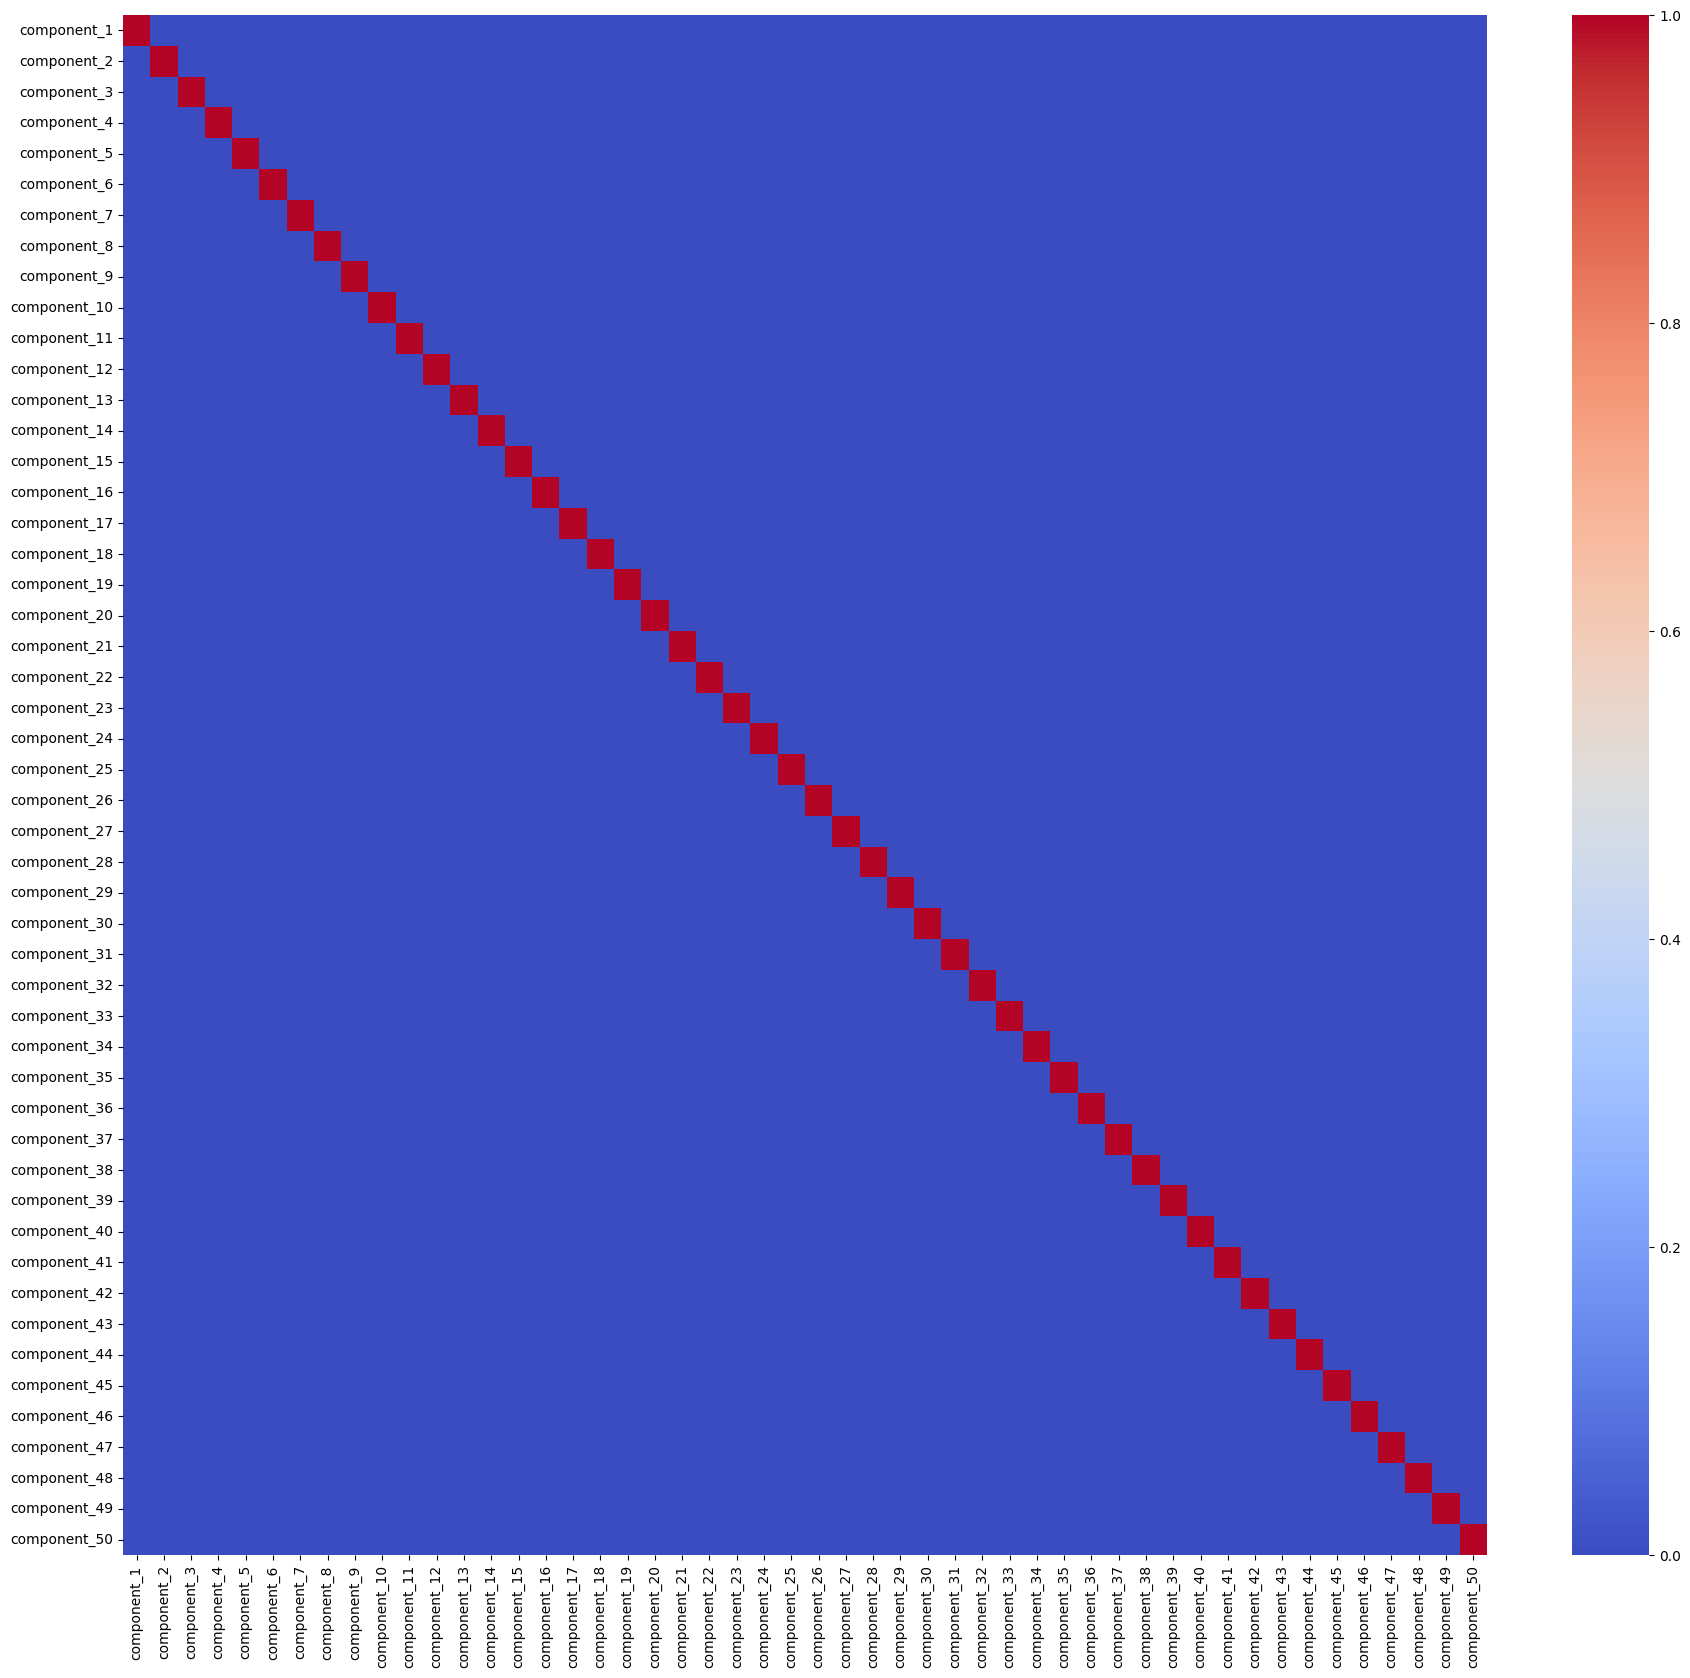

In [151]:
corr_matrix = df_train_features.corr()

plt.figure(figsize=(22, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")

Thus, let's reduce the dimensionality of the dataframe with the **PCA** algorithm (**почему именно его**). чтобы узнать, сколько компонент необходимо оставить, найдём при помощи суммарной объединенной дисперсии. -> 50

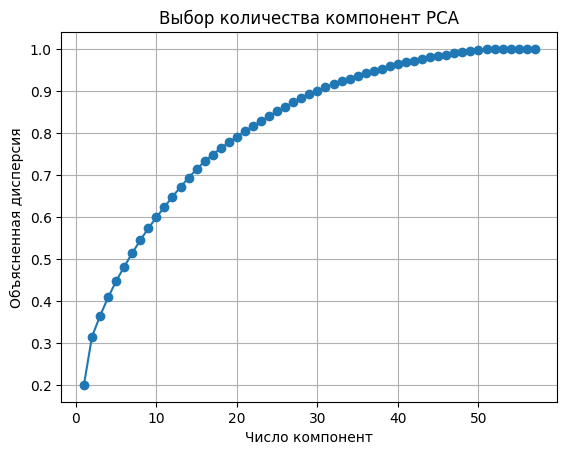

In [145]:
pca = PCA()
df_train_pca = pca.fit_transform(df_train_features)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel("Число компонент")
plt.ylabel("Объясненная дисперсия")
plt.title("Выбор количества компонент PCA")
plt.grid()
plt.show()

In [146]:
pca = PCA(n_components=50)
#
df_train_features_pca = pca.fit_transform(df_train_features)
df_train_features = pd.DataFrame(data=df_train_features_pca,
                                 columns=[f'component_{i+1}' for i in range(50)],
                                 index=df_train_features.index)
df_train_prep = df_train_features.copy()
df_train_prep[duration_col] = train_durations
df_train_prep[event_col] = train_events
#
df_test_features_pca = pca.transform(df_test_features)
df_test_features = pd.DataFrame(data=df_test_features_pca,
                                columns=[f'component_{i+1}' for i in range(50)],
                                index=df_test_features.index)
df_test_prep = df_test_features.copy()

In [147]:
df_train_prep.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_43,component_44,component_45,component_46,component_47,component_48,component_49,component_50,efs_time,efs
ID,,,,,,,,,,,,,,,,,,,,,
0,0.694629,-1.358438,0.123124,0.126798,-0.069210,0.062505,-0.108247,0.065081,0.158130,0.126668,...,0.002322,-0.003415,0.013706,0.010034,0.022368,-0.011739,-0.010450,-0.004935,42.356,0.0
1,0.530684,0.658427,0.658068,-0.437762,-0.106678,1.041601,-0.269566,0.354459,-0.238152,-0.569341,...,-0.004739,-0.018510,0.020729,-0.007299,0.000593,-0.020776,0.006279,-0.016349,4.672,1.0
2,0.636820,-1.287671,0.078541,0.050676,-0.200124,0.183386,-0.154461,0.029530,-0.105036,0.088017,...,-0.003535,-0.004973,0.018220,0.029696,0.005975,-0.001413,-0.008913,-0.003594,19.793,0.0
3,0.643245,-0.515523,0.652682,-0.841556,-0.233209,0.627511,0.730242,-0.035910,0.775119,0.231597,...,0.008232,-0.013232,0.014976,-0.006580,0.023408,-0.009271,-0.001818,-0.010288,102.349,0.0
4,0.672759,0.008038,-0.672507,0.508033,-0.551965,0.050740,-0.628742,0.539758,0.325082,-0.320313,...,-0.007021,-0.014382,0.040354,-0.164871,-0.166183,-0.008556,-0.001144,-0.014044,16.223,0.0


In [148]:
df_test_prep

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_41,component_42,component_43,component_44,component_45,component_46,component_47,component_48,component_49,component_50
ID,,,,,,,,,,,,,,,,,,,,,
28800,0.694629,-1.358438,0.123124,0.126798,-0.069210,0.062505,-0.108247,0.065081,0.158130,0.126668,...,-0.002256,0.004489,0.002322,-0.003415,0.013706,0.010034,0.022368,-0.011739,-0.010450,-0.004935
28801,0.530684,0.658427,0.658068,-0.437762,-0.106678,1.041601,-0.269566,0.354459,-0.238152,-0.569341,...,-0.027916,0.005404,-0.004739,-0.018510,0.020729,-0.007299,0.000593,-0.020776,0.006279,-0.016349
28802,0.636820,-1.287671,0.078541,0.050676,-0.200124,0.183386,-0.154461,0.029530,-0.105036,0.088017,...,-0.010548,0.004080,-0.003535,-0.004973,0.018220,0.029696,0.005975,-0.001413,-0.008913,-0.003594


<Axes: >

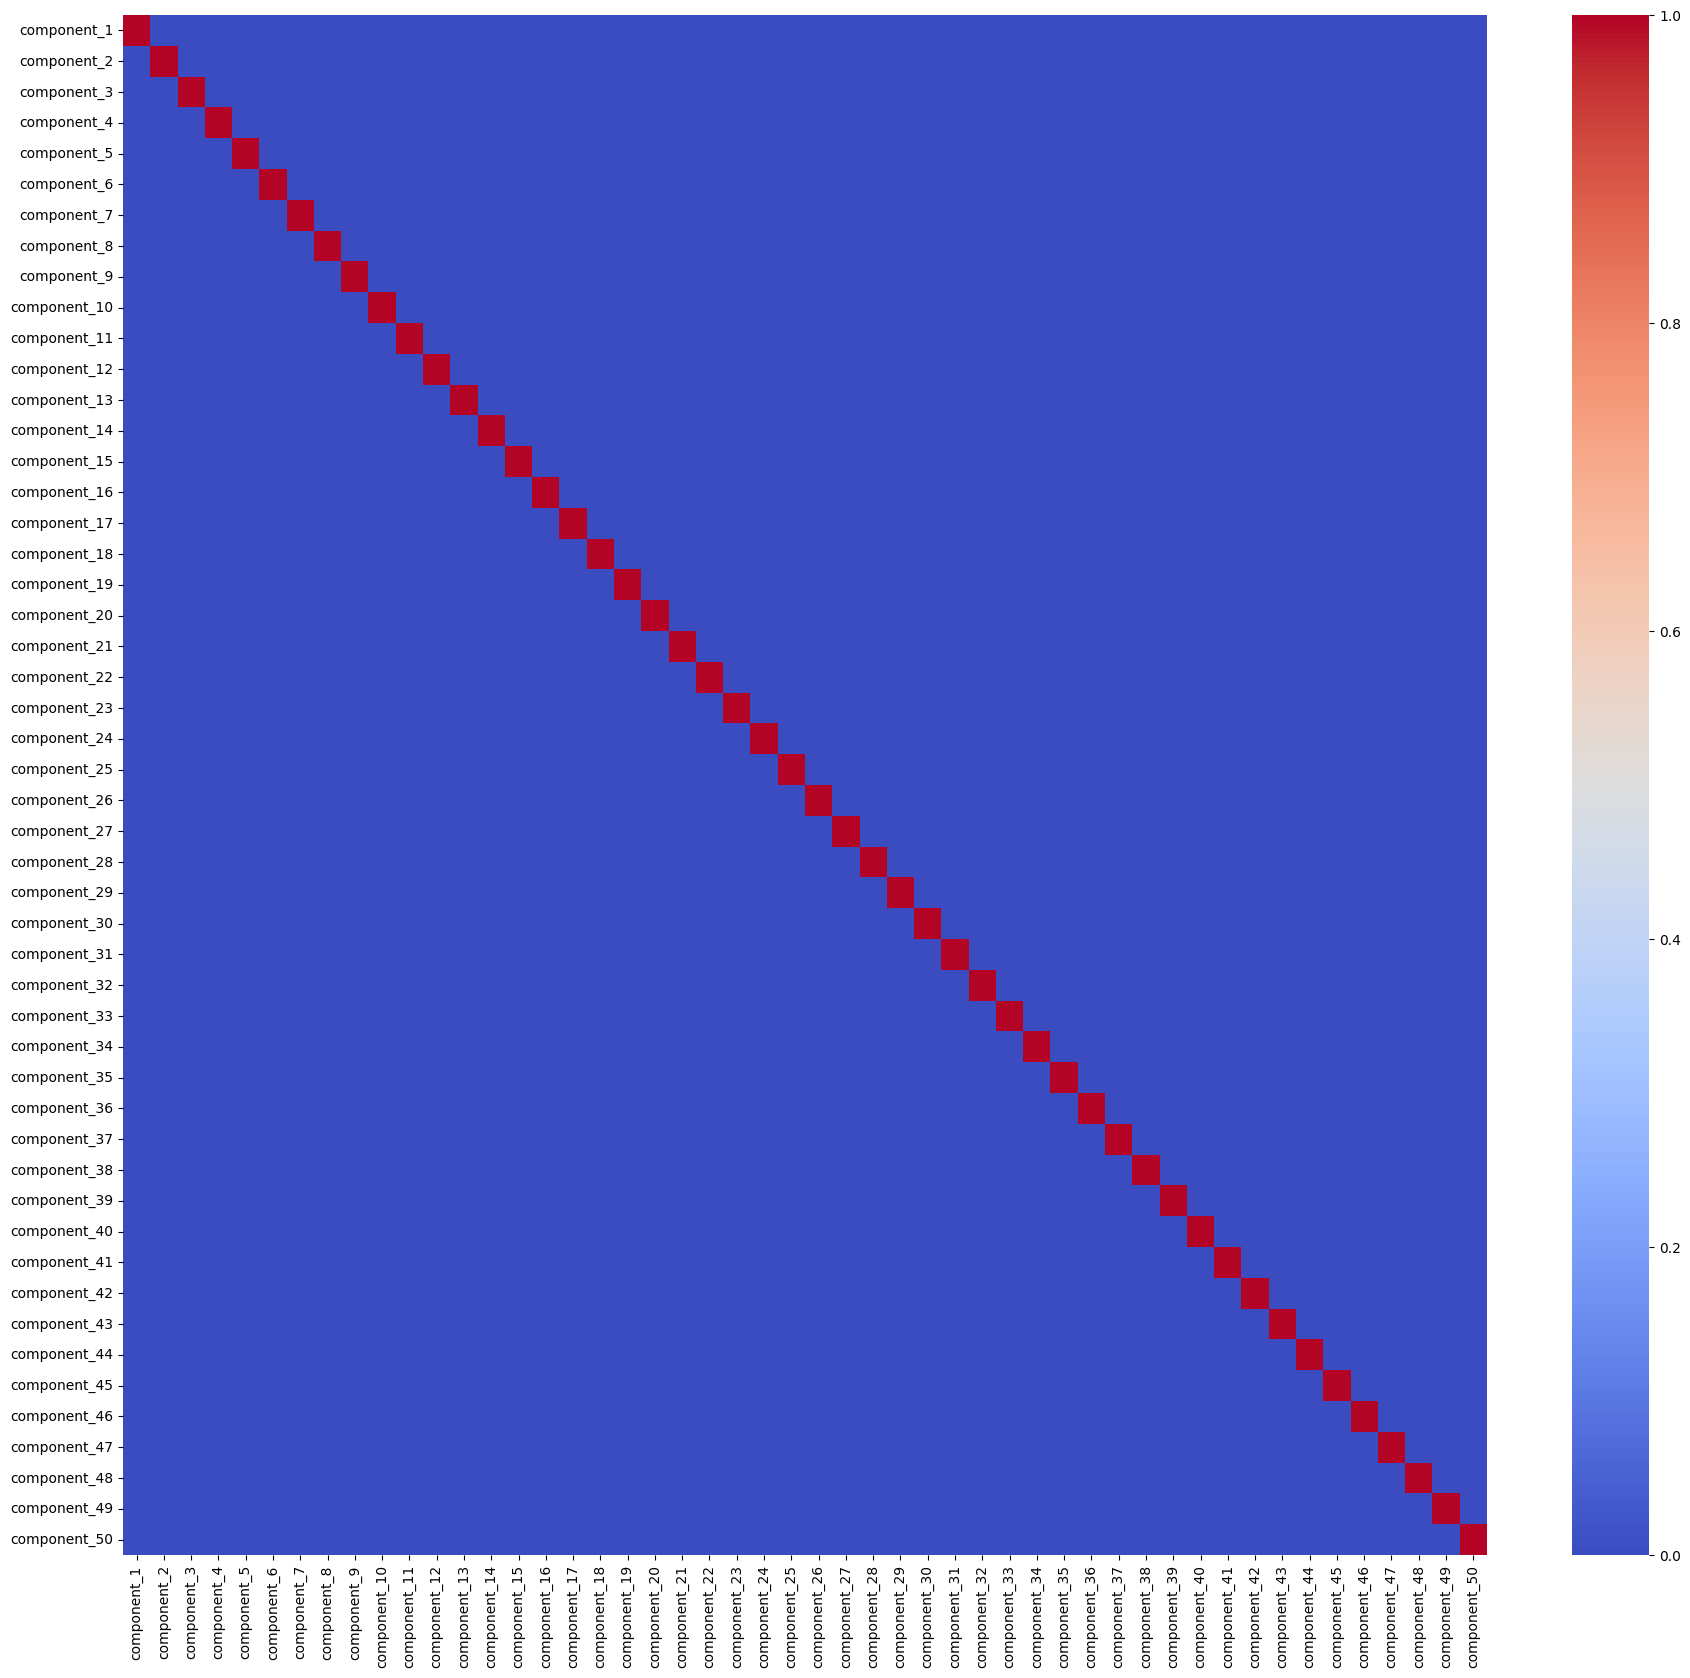

In [149]:
corr_matrix = df_train_features.corr()

plt.figure(figsize=(22, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")

Result:

In [152]:
X = df_train_prep.drop(columns=[duration_col, event_col])
y = df_train_prep[[duration_col, event_col]]

In [153]:
df_train_prep.to_csv('/content/drive/MyDrive/kaggle/CIBMTR_2025/data/train_pca.csv')

## Model

In [32]:
df_train_prep = pd.read_csv('/content/drive/MyDrive/kaggle/CIBMTR_2025/data/train_pca.csv')

In [154]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=e4752ba61ee5629c8eb842f5dec9e4c32148bddd0a8d8e12f30441cbb6c19a23
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [155]:
from lifelines import CoxPHFitter

In [158]:
cph = CoxPHFitter()
cph.fit(df_train_prep, duration_col=duration_col, event_col=event_col)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 28800 total observations, 13268 right-censored observations>
             duration col = 'efs_time'
                event col = 'efs'
      baseline estimation = breslow
   number of observations = 28800
number of events observed = 15532
   partial log-likelihood = -151998.63
         time fit was run = 2025-02-03 13:39:19 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
component_1   0.04      1.04      0.01            0.03            0.06                1.03                1.06
component_2   0.59      1.80      0.01            0.56            0.61                1.76                1.85
component_3   0.00      1.00      0.02           -0.03            0.04                0.97                1.04
component_4  -0.13      0.88      0.02           -0.16           -0.09                0.85                0.91
component_5   0.14      1.15      0.02            0.10            0.18                1.11                1.19
component_6  -0.10      0.90      0.02           -0.14           -0.06                0.87                0.94
component_7   0.17      1.19      0.02            0.13            0.21                1.14                1.23
component_8   0.00      1.00      0.02           -0.04            0.04                0.96                1.04
component_9  -0.27      0.77      0.02           -0.31           -0.22                0.73                0.80
component_10  0.05      1.05      0.02            0.00            0.09                1.00                1.10
component_11  0.01      1.01      0.02           -0.04            0.05                0.96                1.05
component_12  0.02      1.02      0.02           -0.02            0.07                0.98                1.07
component_13  0.12      1.12      0.02            0.07            0.16                1.07                1.18
component_14  0.17      1.18      0.02            0.12            0.21                1.13                1.24
component_15 -0.31      0.73      0.03           -0.36           -0.26                0.70                0.77
component_16  0.32      1.38      0.03            0.27            0.37                1.31                1.45
component_17 -0.33      0.72      0.03           -0.39           -0.27                0.68                0.76
component_18 -0.65      0.52      0.03           -0.71           -0.59                0.49                0.56
component_19 -0.12      0.89      0.03           -0.18           -0.06                0.83                0.94
component_20  0.13      1.14      0.03            0.07            0.19                1.07                1.21
component_21 -0.26      0.77      0.03           -0.32           -0.20                0.72                0.82
component_22 -0.01      0.99      0.03           -0.08            0.06                0.93                1.06
component_23 -0.11      0.90      0.03           -0.17           -0.04                0.84                0.96
component_24  0.36      1.44      0.03            0.30            0.43                1.35                1.53
component_25  0.29      1.34      0.03            0.23            0.36                1.26                1.43
component_26  0.29      1.34      0.04            0.22            0.37                1.24                1.44
component_27 -0.21      0.81      0.04           -0.29           -0.13                0.75                0.88
component_28  0.08      1.09      0.04            0.01            0.16                1.01                1.17
component_29 -0.33      0.72      0.04           -0.40           -0.26                0.67                0.77
component_30  0.27      1.31      0.04            0.20            0.34                1.22                1.41
component_31  0.08      1.08      0.04           -0.00            0.16        

<Axes: >

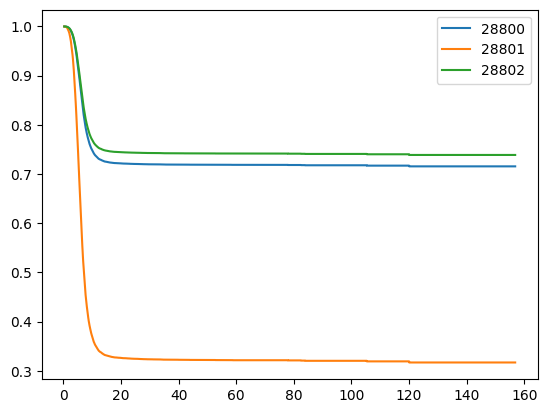

In [163]:
cph.predict_survival_function(df_test_prep).plot()

In [170]:
cph.predict_partial_hazard(df_test_prep)

,0
28800,0.438822
28801,1.507108
28802,0.396979


In [171]:
sample_submission['prediction'] = cph.predict_partial_hazard(df_test_prep)

In [172]:
sample_submission

,prediction
ID,
28800,0.438822
28801,1.507108
28802,0.396979


In [174]:
sample_submission.to_csv('/content/drive/MyDrive/kaggle/CIBMTR_2025/submissions/submission_1.csv')

## Git

In [175]:
!git config --global user.name "serjshul"
!git config --global user.email "shulginsergey0@gmail.com"

In [ ]:
!cp "/content/drive/MyDrive/kaggle/CIBMTR_2025/CIBMTR_2025.ipynb" "/content/CIBMTR_Survival_Predictions"

%cd /content/CIBMTR_Survival_Predictions
!git add .
!git commit -m "Notebook init"
!git push origin main

/content/CIBMTR_Survival_Predictions
[main 43c3595] Notebook init
 1 file changed, 1 insertion(+)
 create mode 100644 CIBMTR_2025.ipynb
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 19.84 KiB | 3.31 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/serjshul/CIBMTR_Survival_Predictions.git
   3a2fc27..43c3595  main -> main


In [ ]:
!git reset --hard HEAD~1

HEAD is now at 3a2fc27 Initial commit
